En este notebook vamos a verificar la correlación de los datos para visualizar la relación entre las variables.

## Librerías

In [1]:
import pandas as pd
import numpy as np
import os
from pathlib import PurePath
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de datos

In [27]:
root = r"C:\Users\Isai\Documents\Tesis\code\data_analysis\all_vars\zafra2021"

In [28]:
dfs = [pd.read_csv(PurePath(root, f), parse_dates=True) for f in os.listdir(root) if f.endswith(".csv")]


In [29]:
to_concat = []
for i in dfs:    
    i['Fecha'] = pd.to_datetime(i['Fecha'])
    i['kc'] = 1.15 * i['ndvi'] + 0.17
    i['etc'] = i['kc'] * i['et']
    i['etc_acum'] = i['etc'].cumsum()
    to_concat.append(i)
    
df = pd.concat(to_concat, ignore_index=True, axis=0)

In [30]:
df.corr(method='pearson')

,Parcela,Fecha,dias,ndvi,ndmi,msi,temp,dia_x,reconstruida_temp,ajustados_temp,...,dia,reconstruida_et,ajustados_et,et_acum,et_acum_ajustados,rh12,holtwinters_predicts,kc,etc,etc_acum
Parcela,1.000000,0.114458,-0.105900,0.059388,0.087008,-0.084095,0.009414,0.114458,0.010196,0.014950,...,0.114458,0.025390,0.023471,-0.094691,-0.089419,-0.023571,-0.025653,0.059388,0.061117,-0.038588
Fecha,0.114458,1.000000,0.774843,0.694370,0.753856,-0.775518,-0.135538,1.000000,-0.145939,-0.188631,...,1.000000,-0.187856,-0.228645,0.760387,0.770746,0.064561,0.079074,0.694370,0.263101,0.836050
dias,-0.105900,0.774843,1.000000,0.672350,0.757308,-0.748286,-0.157116,0.774843,-0.168880,-0.217382,...,0.774843,-0.193583,-0.235598,0.992397,0.991078,0.059898,0.075146,0.672350,0.248679,0.984775
ndvi,0.059388,0.694370,0.672350,1.000000,0.975560,-0.976166,0.079315,0.694370,0.085682,0.080125,...,0.694370,-0.102493,-0.064565,0.689516,0.697072,0.264961,0.309778,1.000000,0.540260,0.698812
ndmi,0.087008,0.753856,0.757308,0.975560,1.000000,-0.993857,0.020581,0.753856,0.022262,0.002864,...,0.753856,-0.124619,-0.109738,0.769313,0.775850,0.215777,0.254025,0.975560,0.505539,0.782023
msi,-0.084095,-0.775518,-0.748286,-0.976166,-0.993857,1.000000,-0.034846,-0.775518,-0.037506,-0.022224,...,-0.775518,0.106444,0.088602,-0.759033,-0.765302,-0.214645,-0.252034,-0.976166,-0.523410,-0.773835
temp,0.009414,-0.135538,-0.157116,0.079315,0.020581,-0.034846,1.000000,-0.135538,0.927042,0.746465,...,-0.135538,0.755498,0.676073,-0.113181,-0.114764,0.059957,0.067710,0.079315,0.682825,-0.154831
dia_x,0.114458,1.000000,0.774843,0.694370,0.753856,-0.775518,-0.135538,1.000000,-0.145939,-0.188631,...,1.000000,-0.187856,-0.228645,0.760387,0.770746,0.064561,0.079074,0.694370,0.263101,0.836050
reconstruida_temp,0.010196,-0.145939,-0.168880,0.085682,0.022262,-0.037506,0.927042,-0.145939,1.000000,0.805288,...,-0.145939,0.815498,0.729508,-0.121650,-0.123282,0.060891,0.063533,0.085682,0.650575,-0.166497
ajustados_temp,0.014950,-0.188631,-0.217382,0.080125,0.002864,-0.022224,0.746465,-0.188631,0.805288,1.000000,...,-0.188631,0.738403,0.937391,-0.169618,-0.169311,0.162945,0.184500,0.080125,0.616036,-0.225744


## Correlación

         ndvi      etc
ndvi  1.00000  0.54026
etc   0.54026  1.00000
0.5402600777238857


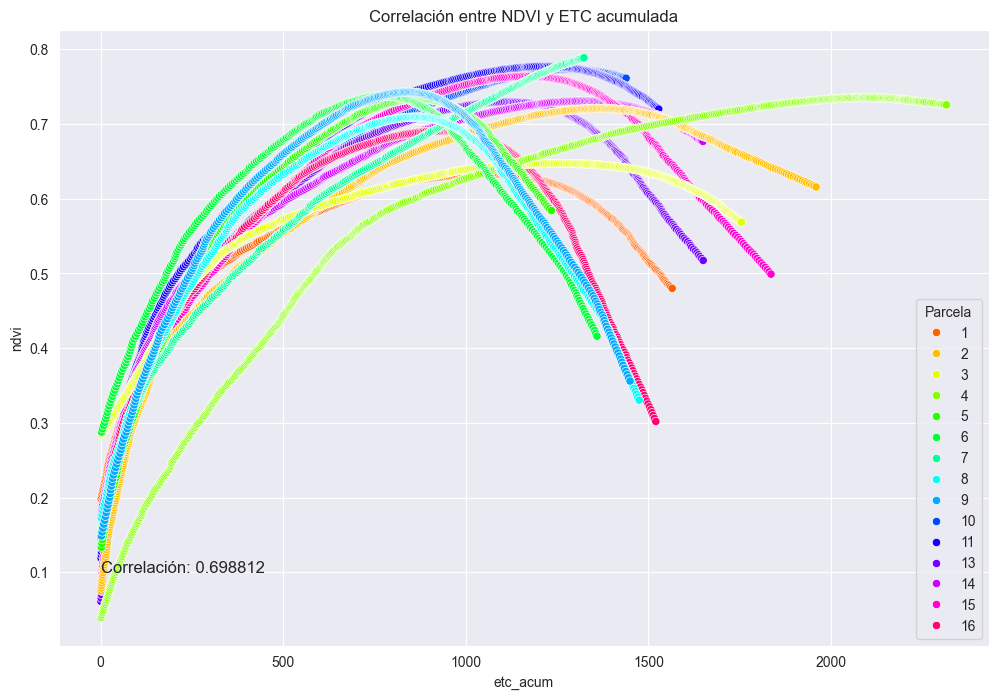

In [32]:
ids = df['Parcela'].unique()
palette = sns.color_palette("hsv", len(ids))
print(df[['ndvi', 'etc']].corr(method='pearson'))
print(df['ndvi'].corr(df['etc'], method='pearson'))

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='etc_acum', y='ndvi', hue='Parcela', palette=palette)
plt.title('Correlación entre NDVI y ETC acumulada')
plt.legend(title='Parcela')
plt.text(0.1, 0.1, f'Correlación: {df["ndvi"].corr(df["etc_acum"], method="pearson"):3f}', fontsize=12)
plt.savefig(PurePath(r"C:\Users\Isai\Documents\Tesis\code\revision\img\2021\correlacion", 'correlation_ndvi_etc_acum.png'), dpi=300)
plt.show()